In [1]:
import seaborn
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sn

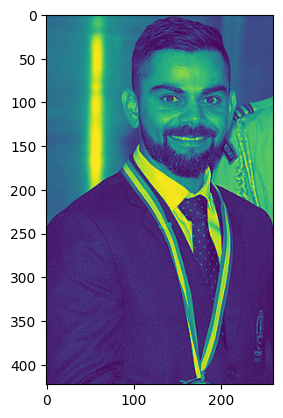

In [2]:
img=cv2.imread('Images/virat_kohli/kohli1.jpg')
# plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray.shape
plt.imshow(gray)

In [3]:
face_cascade = cv2.CascadeClassifier('Haar Casscades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('Haar Casscades/haarcascade_eye.xml')

In [4]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[102,  47, 124, 124]])

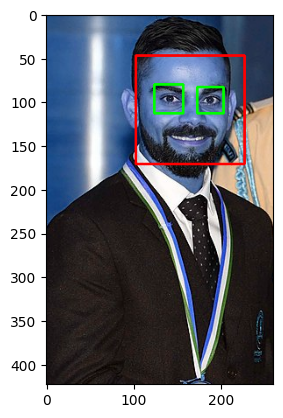

In [5]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img)

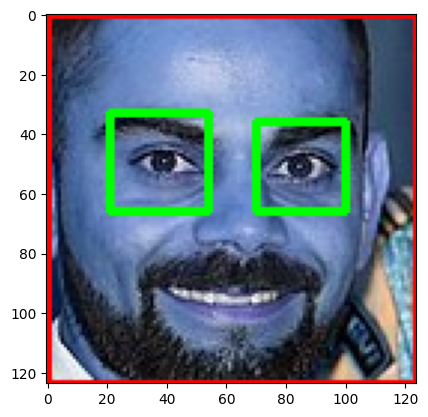

In [6]:
plt.imshow(roi_color,cmap='gray')

In [7]:
def get_cropped_image_if_2_eyes(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_colour=image[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_colour

In [8]:
path_to_data='Images/'
path_to_cr_data='Images/Cropped/'

In [9]:
import os 
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [10]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [11]:
img_dirs

['Images/babar_azam',
 'Images/christiano_ronaldo',
 'Images/lionel_messi',
 'Images/roger_federer',
 'Images/virat_kohli']

In [12]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

babar_azam
Generating cropped images in folder:  Images/Cropped/babar_azam
christiano_ronaldo
Generating cropped images in folder:  Images/Cropped/christiano_ronaldo
lionel_messi
Generating cropped images in folder:  Images/Cropped/lionel_messi
roger_federer
Generating cropped images in folder:  Images/Cropped/roger_federer
virat_kohli
Generating cropped images in folder:  Images/Cropped/virat_kohli


In [13]:
import numpy as np 
import pywt

def w2d(img,mode='haar',level=1):
    inArray=img
    inArray=cv2.cvtColor(inArray,cv2.COLOR_BGR2GRAY)
    inArray=np.float32(inArray)
    inArray/=255;
    coeffs=pywt.wavedec2(inArray,mode,level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0;
    inArray_H=pywt.waverec2(coeffs_H,mode);
    inArray_H*=255;
    inArray_H=np.uint8(inArray_H)

    return inArray_H

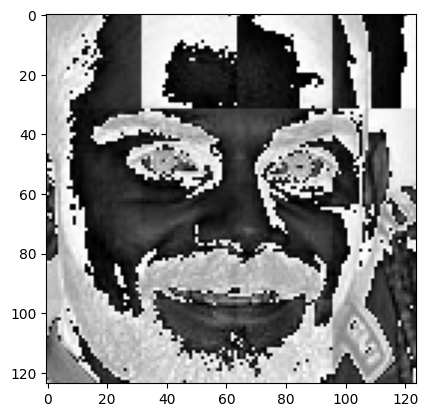

In [14]:
crop_image=cv2.imread('Images/Cropped/virat_kohli/virat_kohli48.png')
im_har=w2d(crop_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [15]:
# celebrity_file_names_dict.pop('Cropped')
celebrity_file_names_dict

{'babar_azam': ['Images/Cropped/babar_azam/babar_azam1.png',
  'Images/Cropped/babar_azam/babar_azam2.png',
  'Images/Cropped/babar_azam/babar_azam3.png',
  'Images/Cropped/babar_azam/babar_azam4.png',
  'Images/Cropped/babar_azam/babar_azam5.png',
  'Images/Cropped/babar_azam/babar_azam6.png',
  'Images/Cropped/babar_azam/babar_azam7.png',
  'Images/Cropped/babar_azam/babar_azam8.png',
  'Images/Cropped/babar_azam/babar_azam9.png',
  'Images/Cropped/babar_azam/babar_azam10.png',
  'Images/Cropped/babar_azam/babar_azam11.png',
  'Images/Cropped/babar_azam/babar_azam12.png',
  'Images/Cropped/babar_azam/babar_azam13.png',
  'Images/Cropped/babar_azam/babar_azam14.png',
  'Images/Cropped/babar_azam/babar_azam15.png',
  'Images/Cropped/babar_azam/babar_azam16.png',
  'Images/Cropped/babar_azam/babar_azam17.png',
  'Images/Cropped/babar_azam/babar_azam18.png',
  'Images/Cropped/babar_azam/babar_azam19.png',
  'Images/Cropped/babar_azam/babar_azam20.png',
  'Images/Cropped/babar_azam/babar_

In [16]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
# for i in class_dict:
#     print(class_dict[celebrity_name])
class_dict

{'babar_azam': 0,
 'christiano_ronaldo': 1,
 'lionel_messi': 2,
 'roger_federer': 3,
 'virat_kohli': 4}

In [35]:
X,y=[],[]

for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32*1,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [36]:
X

[array([[  5],
        [  5],
        [  5],
        ...,
        [200],
        [ 41],
        [  1]], dtype=uint8),
 array([[ 87],
        [ 89],
        [ 89],
        ...,
        [175],
        [164],
        [176]], dtype=uint8),
 array([[ 26],
        [ 26],
        [ 26],
        ...,
        [ 12],
        [175],
        [  0]], dtype=uint8),
 array([[  5],
        [ 10],
        [ 18],
        ...,
        [ 52],
        [ 76],
        [111]], dtype=uint8),
 array([[209],
        [209],
        [209],
        ...,
        [254],
        [  4],
        [  3]], dtype=uint8),
 array([[179],
        [183],
        [184],
        ...,
        [  1],
        [ 20],
        [ 27]], dtype=uint8),
 array([[237],
        [228],
        [218],
        ...,
        [135],
        [172],
        [ 56]], dtype=uint8),
 array([[ 39],
        [ 39],
        [ 39],
        ...,
        [113],
        [185],
        [101]], dtype=uint8),
 array([[150],
        [190],
        [241],
        ...

In [38]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(150, 4096)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [41]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

0.7105263157894737

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_params={
    'svm': {
        'model':SVC(gamma='auto',probability=True),
        'params':{
            'svm__C':[1,10,100,1000],
            'svm__kernel':['rbf','linear']
        }
    },
    'random_forest':{
        'model':RandomForestClassifier(),
        'params':{
            'random_forest__n_estimators':[1,5,10]
        }
    },
    'logistic_regression':{
        'model':LogisticRegression(solver='liblinear',multi_class='auto'),
        'params':{
            'logistic_regression__C':[1,5,10]
        }
    }
}

In [45]:
scores=[]
best_estimator={}
list=['svm','random_forest','logistic_regression']
i=0
import pandas as pd
for algo,mp in model_params.items():
    pipe=Pipeline([('scaler',StandardScaler()),(list[i],mp['model'])])
    clf=GridSearchCV(pipe,param_grid=(mp['params']),cv=5)
    clf.fit(X_train,y_train)
    scores.append({
        'model':algo,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    best_estimator[algo]=clf.best_estimator_
    i=i+1
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.857708,"{'svm__C': 1, 'svm__kernel': 'linear'}"
1,random_forest,0.688538,{'random_forest__n_estimators': 10}
2,logistic_regression,0.866798,{'logistic_regression__C': 5}


In [46]:
best_estimator['svm'].score(X_test,y_test)

0.7894736842105263

In [47]:
best_estimator['random_forest'].score(X_test,y_test)

0.6052631578947368

In [48]:
best_estimator['logistic_regression'].score(X_test,y_test)

0.7631578947368421

In [49]:
best_clf=best_estimator['svm']

In [50]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,best_clf.predict(X_test))
cm

array([[8, 0, 0, 0, 0],
       [0, 4, 0, 3, 0],
       [1, 1, 6, 0, 0],
       [1, 2, 0, 5, 0],
       [0, 0, 0, 0, 7]], dtype=int64)

Text(95.72222222222221, 0.5, 'truth')

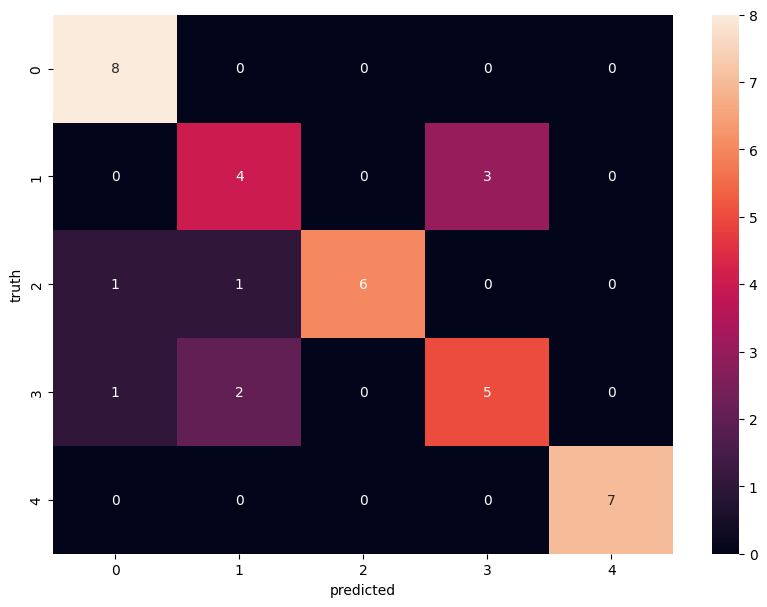

In [51]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [52]:
class_dict

{'babar_azam': 0,
 'christiano_ronaldo': 1,
 'lionel_messi': 2,
 'roger_federer': 3,
 'virat_kohli': 4}

In [53]:
import joblib
joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [54]:
import json
with open('class_dict.json','w')as f:
    f.write(json.dumps(class_dict))